In [1]:
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/zameen-nov2020-lw.csv', parse_dates=True)

/Users/abdur_rehman/miniconda3/envs/ml/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.dtypes

Property ID               object
Purpose                   object
Type                      object
Title                     object
Subtitle                  object
Location                  object
Area                      object
Price                     object
Beds                     float64
Baths                    float64
Year of Construction      object
Servant Quarters         float64
Parking Spaces           float64
Double Glazed Windows     object
Central AC                object
Park                      object
Jacuzzi                   object
Agency                    object
Agent                     object
Titanium Agency?          object
Agency Video              object
Number of Images           int64
Tour Video                object
Property Verified         object
Date Scraped              object
URL                       object
Added                     object
Date Last Updated         object
Locality                  object
City                      object
Area_marla

In [4]:
df['Date Scraped'] = pd.to_datetime(df['Date Scraped'])

In [5]:
df['Date Scraped'].value_counts().reset_index()['index'].sort_values()

6   2020-11-24
5   2020-11-25
2   2020-11-26
3   2020-11-27
0   2020-11-28
1   2020-11-29
4   2020-11-30
Name: index, dtype: datetime64[ns]

In [6]:
df.shape

(1222095, 35)

In [7]:
pd.set_option('display.max_columns', 50)

In [8]:
df.head(1)

,Property ID,Purpose,Type,Title,Subtitle,Location,Area,Price,Beds,Baths,Year of Construction,Servant Quarters,Parking Spaces,Double Glazed Windows,Central AC,Park,Jacuzzi,Agency,Agent,Titanium Agency?,Agency Video,Number of Images,Tour Video,Property Verified,Date Scraped,URL,Added,Date Last Updated,Locality,City,Area_marlas,Price_rupees,Age,Freshness_days,Prob_Fresh
0,House 24337325,For Sale,House,Original Pics 1 Kanal Spanish Solid Bungalows ...,"State Life Housing Phase 1, State Life Housing...","State Life Housing Society, Lahore, Punjab",1 Kanal,4.35 Crore,5.0,6.0,NaN,NaN,NaN,No,No,No,No,Modern Edge Estate & Builders,Muhammad Tanveer,Yes,No,35,No,No,2020-11-24,https://www.zameen.com/Property/state_life_hou...,15 minutes,2020-11-24,State Life Housing Society,Lahore,20.0,43500000,NaN,0,0.285714


In [9]:
df.isna().sum()

Property ID                    0
Purpose                        0
Type                           0
Title                          7
Subtitle                       0
Location                       0
Area                           0
Price                          0
Beds                      618566
Baths                     631646
Year of Construction     1068182
Servant Quarters         1085787
Parking Spaces           1052154
Double Glazed Windows          0
Central AC                     0
Park                           0
Jacuzzi                        0
Agency                    151969
Agent                     151976
Titanium Agency?               0
Agency Video                   0
Number of Images               0
Tour Video                     0
Property Verified              0
Date Scraped                   0
URL                            0
Added                          0
Date Last Updated              0
Locality                       0
City                           0
Area_marla

### Fix Property ID

In [10]:
df['Property ID_new'] = df['Property ID'].apply(lambda x: x.split(' ')[-1])

In [11]:
df['Property ID_new'].apply(lambda x: len(x)).value_counts()

8    1218695
7       3261
6        139
Name: Property ID_new, dtype: int64

In [12]:
df.drop('Property ID', axis=1, inplace=True)

In [13]:
df.rename(columns={'Property ID_new': 'Property ID'}, inplace=True)

In [14]:
df = df[['Property ID', 'Purpose', 'Type', 'Title', 'Subtitle', 'Location', 'Area', 'Price',
         'Beds', 'Baths', 'Year of Construction', 'Servant Quarters',
         'Parking Spaces', 'Double Glazed Windows', 'Central AC', 'Park',
         'Jacuzzi', 'Agency', 'Agent', 'Titanium Agency?', 'Agency Video',
         'Number of Images', 'Tour Video', 'Property Verified', 'Date Scraped',
         'URL', 'Added', 'Date Last Updated', 'Locality', 'City', 'Area_marlas',
         'Price_rupees', 'Age', 'Freshness_days', 'Prob_Fresh']].copy()

### Fix Price

In [15]:
df['Price_rupees_crores'] = df['Price_rupees']/10e6

In [16]:
df['Price_rupees_lakhs'] = df['Price_rupees']/1e5

In [17]:
df['Price_per_marla'] = df['Price_rupees_lakhs'] / df['Area_marlas']

# EDA

In [21]:
%matplotlib inline

In [22]:
sns.set()

## Purpose, Type

In [23]:
df['Purpose'].value_counts(normalize=True)

For Sale    0.747622
For Rent    0.252378
Name: Purpose, dtype: float64

In [24]:
df['Type'].value_counts(normalize=True)

Residential Plot     0.416961
House                0.285304
Flat                 0.138929
Upper Portion        0.065160
Lower Portion        0.038112
Commercial Plot      0.031750
Plot File            0.013955
Farm House           0.002451
Room                 0.002411
Industrial Land      0.002172
Agricultural Land    0.001373
Penthouse            0.001123
Plot Form            0.000162
Plot                 0.000138
Name: Type, dtype: float64

In [25]:
pd.set_option('min_rows', 500)

In [26]:
# df[df['Type'] == 'Plot'].sort_values(by='Price_rupees_crores', ascending=False)

In [27]:
df['Type'] = np.where(df['Type'].isin(['Plot', 'Plot Form', 'Plot File']), 'Residential Plot', df['Type'])

In [30]:
df['Type'].value_counts(normalize=True)

Residential Plot    0.435365
House               0.288048
Flat                0.140265
Upper Portion       0.065787
Lower Portion       0.038478
Commercial Plot     0.032056
Name: Type, dtype: float64

In [29]:
# filter out farmhouse, room, industrial land, agricultural land, penthouse
df = df[~df['Type'].isin(['Farm House', 'Room', 'Industrial Land', 'Agricultural Land', 'Penthouse'])].copy()

In [31]:
type_order = df['Type'].value_counts(normalize=True).reset_index()['index'].tolist()

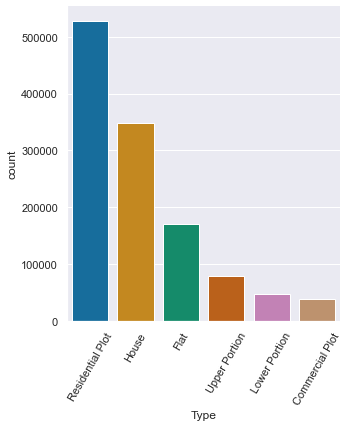

In [32]:
sns.catplot(x='Type', kind='count', data=df, order=type_order, palette='colorblind')
plt.xticks(rotation=60)
plt.show()

### Plots

In [33]:
plots = df[df['Type'].isin(['Residential Plot', 'Commercial Plot'])].copy()

In [34]:
plots.reset_index(drop=True, inplace=True)

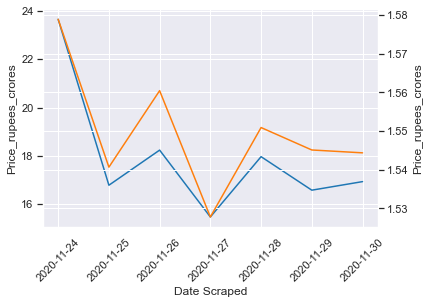

In [39]:
plt.xticks(rotation=45)

sns.lineplot(x='Date Scraped', y='Price_rupees_crores', ci=None,
             data=plots[plots['Type'] == 'Commercial Plot'], color='tab:blue')
ax2 = plt.twinx()
sns.lineplot(x='Date Scraped', y='Price_rupees_crores', ci=None,
             data=plots[plots['Type'] == 'Residential Plot'], ax=ax2, color='tab:orange')

plt.show()

In [40]:
res_plots =plots[plots['Type'] == 'Residential Plot'].copy()

In [41]:
res_plots.groupby('Date Scraped')['Price_rupees_crores'].mean()

Date Scraped
2020-11-24    1.578868
2020-11-25    1.540681
2020-11-26    1.560430
2020-11-27    1.527810
2020-11-28    1.550906
2020-11-29    1.545112
2020-11-30    1.544374
Name: Price_rupees_crores, dtype: float64

#### Prices by City

In [42]:
res_plots.groupby(['City', 'Date Scraped'])['Price_rupees_crores'].mean().reset_index()

,City,Date Scraped,Price_rupees_crores
0,Islamabad,2020-11-24,1.423624
1,Islamabad,2020-11-25,1.399585
2,Islamabad,2020-11-26,1.511735
3,Islamabad,2020-11-27,1.447422
4,Islamabad,2020-11-28,1.515876
5,Islamabad,2020-11-29,1.508328
6,Islamabad,2020-11-30,1.422684
7,Karachi,2020-11-24,1.765718
8,Karachi,2020-11-25,1.838665
9,Karachi,2020-11-26,1.786241


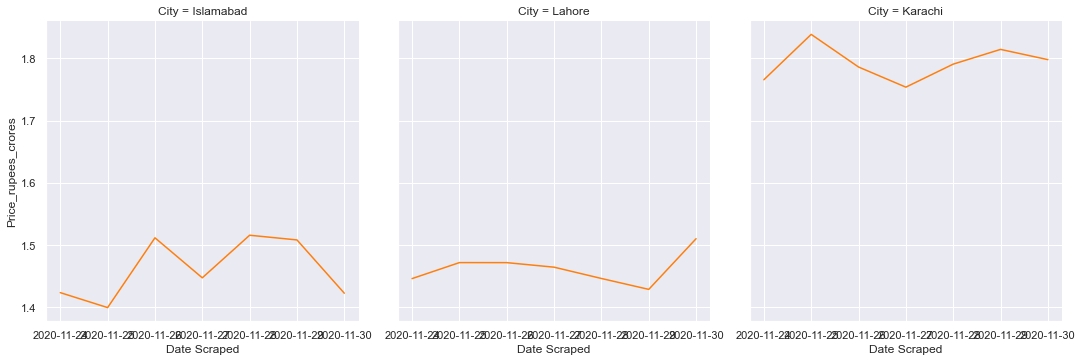

In [43]:
sns.relplot(x='Date Scraped', y='Price_rupees_crores', ci=None, col='City', kind='line',
             data=res_plots, color='tab:orange')

#### Prices by Locality

In [44]:
res_plots['Locality_clean'] = np.where(res_plots['Locality'].str.contains('DHA'), 'DHA', res_plots['Locality'])

In [45]:
res_plots['Locality_clean'] = np.where(res_plots['Locality_clean'].str.contains('Bahria'), 'Bahria Town', res_plots['Locality_clean'])

In [46]:
top_locs = res_plots['Locality_clean'].value_counts(normalize=True)[:10].reset_index()['index'].tolist()

In [47]:
res_plots_top = res_plots[res_plots['Locality_clean'].isin(top_locs)].copy()

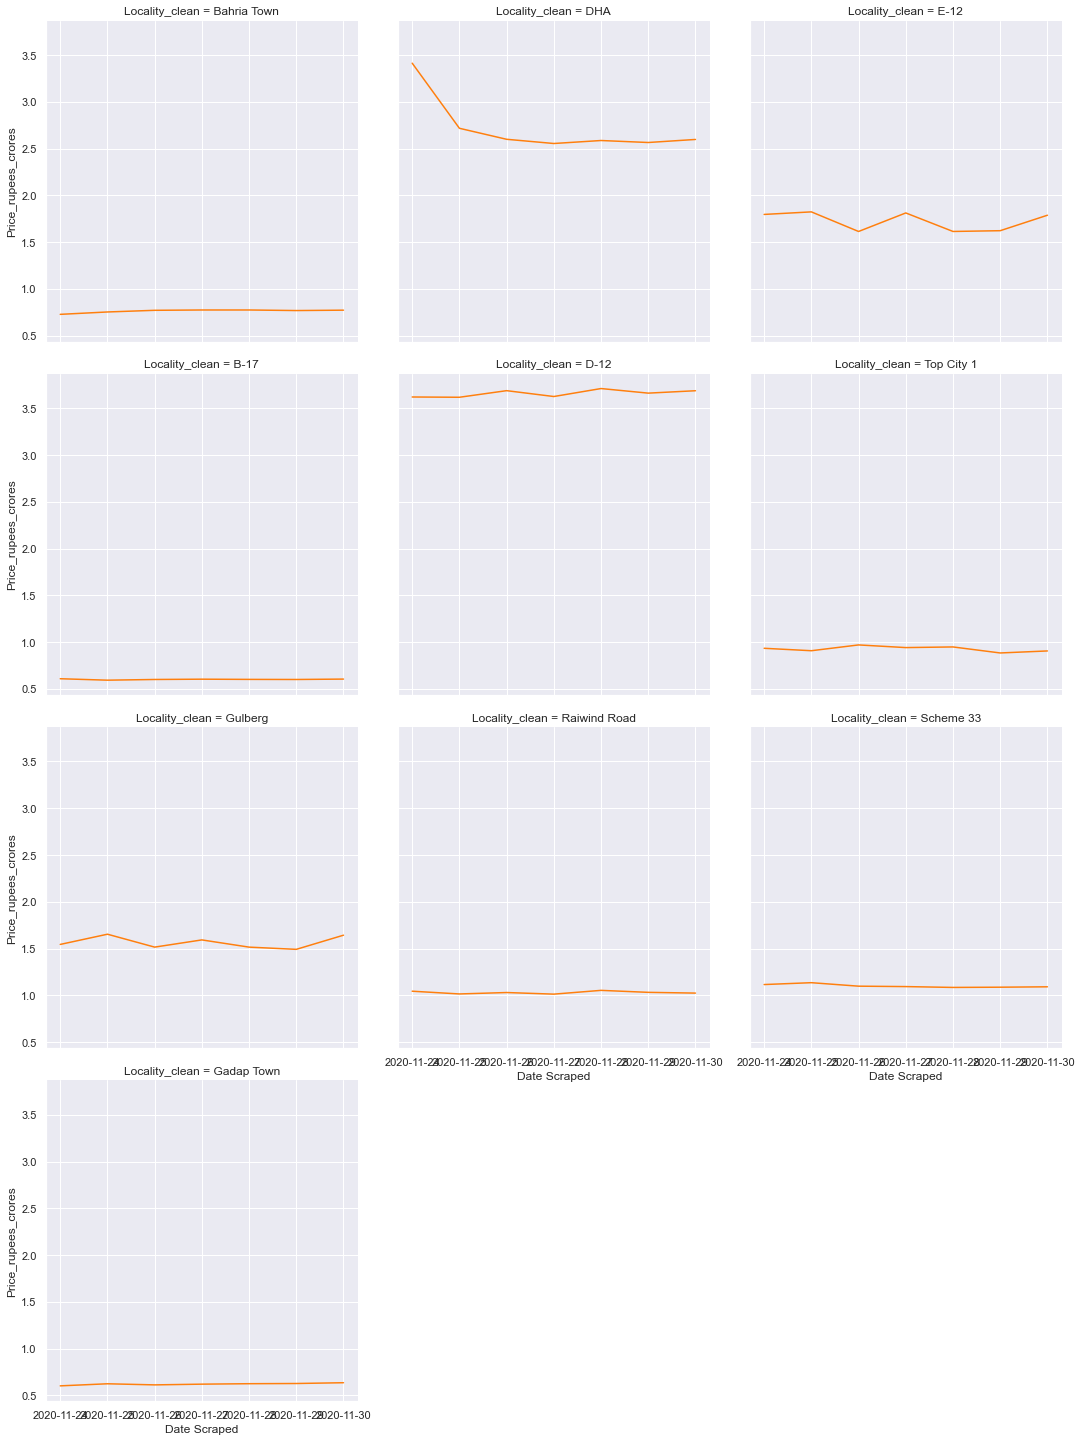

In [48]:
sns.relplot(x='Date Scraped', y='Price_rupees_crores', ci=None, col='Locality_clean', kind='line', col_wrap=3,
             data=res_plots_top, color='tab:orange')

#### DHA prices

In [49]:
res_plots_dha = res_plots[res_plots['Locality_clean'] == 'DHA'].copy()

In [50]:
ten_marlas = res_plots_dha[res_plots_dha['Area_marlas'].isin([5.0, 10.0, 20.0, 40.0])].copy()

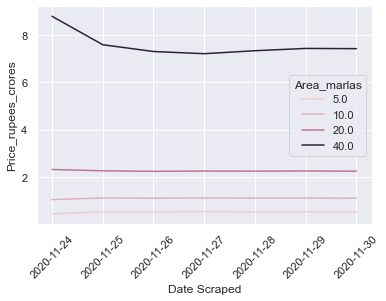

In [52]:
plt.xticks(rotation=45)
sns.lineplot(x='Date Scraped', y='Price_rupees_crores', ci=None, hue='Area_marlas',
             data=ten_marlas, color='tab:orange')

plt.show()

In [53]:
houses = df[df['Type'].isin(['House'])].copy()
flats = df[df['Type'].isin(['Flat'])].copy()

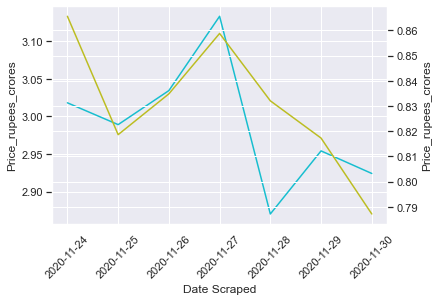

In [59]:
plt.xticks(rotation=45)

sns.lineplot(x='Date Scraped', y='Price_rupees_crores', ci=None,
             data=houses, color='tab:cyan')

ax2 = plt.twinx()
sns.lineplot(x='Date Scraped', y='Price_rupees_crores', ci=None,
             data=flats, ax=ax2, color='tab:olive')

plt.show()

#### House prices by City

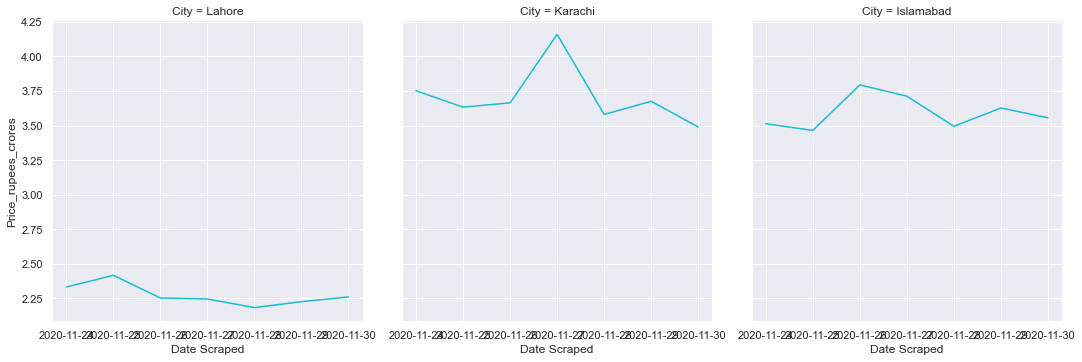

In [60]:
sns.relplot(x='Date Scraped', y='Price_rupees_crores', data=houses, col='City', ci=None, kind='line', color='tab:cyan')


#### Flat prices by City

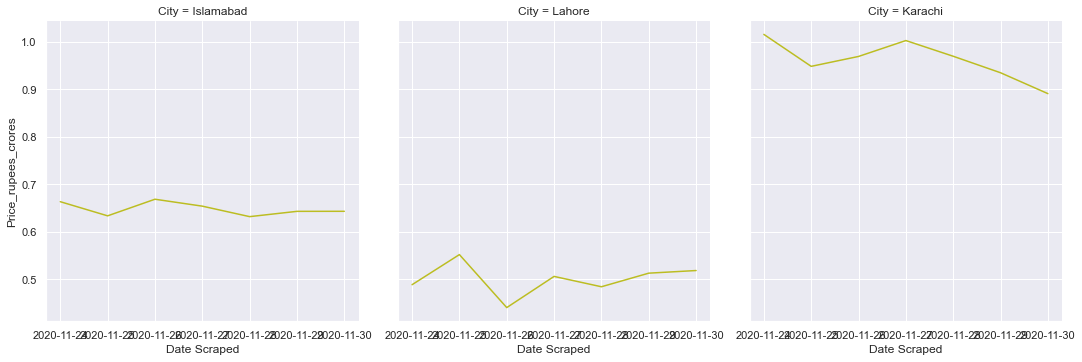

In [61]:
sns.relplot(x='Date Scraped', y='Price_rupees_crores', data=flats, col='City', ci=None, kind='line', color='tab:olive')
